# Econometrics Analysis
#### Gerardo Durán Martín
$$
    Y = \beta_1 + \beta_2 X
$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import t, chi2

In [2]:
beta2 = lambda X, Y: np.sum((X - np.mean(X)) * (Y - np.mean(Y))) \
                     / np.sum((X - np.mean(X))**2)
beta1 = lambda X, Y: np.mean(Y) - beta2(X, Y) * np.mean(X)

In [3]:
t24 = {"X": np.arange(80, 260+20, 20),
       "Y": [70, 65, 90, 95, 110, 115, 120, 140, 155, 150]} 

t25 = {"X": np.arange(80, 260+20, 20),
       "Y": [55, 88, 90, 80, 118, 120, 145, 135, 145, 175]}

t24 = pd.DataFrame(t24)
t25 = pd.DataFrame(t25)

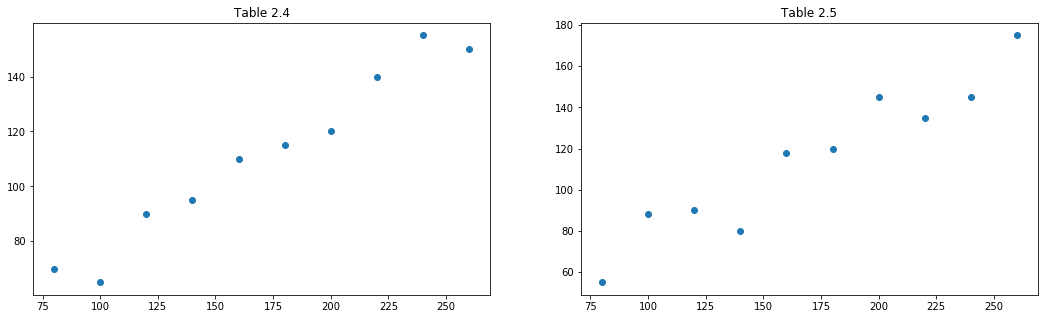

In [4]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
plt.scatter(t24.X, t24.Y)
plt.title("Table 2.4")

ax2 = fig.add_subplot(122)
plt.scatter(t25.X, t25.Y)
plt.title("Table 2.5")
plt.show()

# Regressing Tables

Given $X, Y \in \mathbb{R}^n $ , we regress $X$ on $Y$ using the formula
$$
    \beta_1 = \bar Y - \hat\beta_2 \bar X\\
    \beta_2 = \frac{\sum_i x_i y_i}{\sum_i x_i^2}
$$

where
- $x_i := X_i - \bar X$
- $y_i := Y_i - \bar Y$

## $\mathbb{V}ariances$
For $\beta_1$, $\beta_2$, $\epsilon$, their variances are given as:

$$\mathbb{V}(\epsilon) = \mathbb{E}[\epsilon^2]$$
$$\mathbb{V}(\beta_1) = \frac{\sum_i X_i^2}{\sum_i x_i^2}$$
$$\mathbb{V}(\beta_2) = \frac{\sigma^2}{\sum_i x_i ^ 2}$$

where
$$
    \sigma^2 = \frac{1}{n-2}\sum_i \epsilon_i^2
$$

## Table 2.4

In [5]:
t24["fit"] = beta1(**t24) + beta2(**t24) * t24.X
t24

,X,Y,fit
0,80,70,65.181818
1,100,65,75.363636
2,120,90,85.545455
3,140,95,95.727273
4,160,110,105.909091
5,180,115,116.090909
6,200,120,126.272727
7,220,140,136.454545
8,240,155,146.636364
9,260,150,156.818182


In [6]:
sigma2 = sum((t24.Y - t24.Y.mean())**2) / (len(t24) - 2)
var_b1 = sum(t24.X**2) / sum((t25.X - t24.X.mean())**2)
var_b2 = sigma2 / sum((t24.X - t24.X.mean())**2)

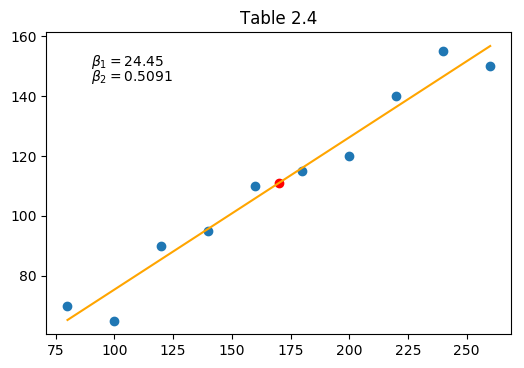

In [7]:
plt.figure(dpi=100)
plt.scatter(t24.X, t24.Y)
plt.title("Table 2.4")
beta1_24 = beta1(t24.X, t24.Y)
beta2_24 = beta2(t24.X, t24.Y)
plt.plot(t24.X, t24.fit, color="orange")

plt.scatter(np.mean(t24.X), np.mean(t24.Y), color="red")
plt.text(90, 150, r"$\beta_1 = {}$".format(round(beta1_24, 2)))
plt.text(90, 145, r"$\beta_2 = {}$".format(round(beta2_24, 4)))
plt.show()

 $$\hat{\bar{Y}} = \bar{Y}$$

In [8]:
print("Bar Hat Y", np.mean(t24.fit))
print("Bar Y", np.mean(t24.Y))

Bar Hat Y 111.0
Bar Y 111.0


$$
    \bar \epsilon \approx 0
$$

In [9]:
sum(t24.Y - t24.fit)

-1.4210854715202004e-14

$k_i$ is defined as:

$$
    k_i := \frac{x_i}{\sum_j x_j^2}
$$

In [10]:
x = (t24.X - np.mean(t24.X))
y = (t24.Y - np.mean(t24.Y))
k = x / sum(x**2)

# Errors

In [11]:
t24["err"] = t24.fit - t24.Y

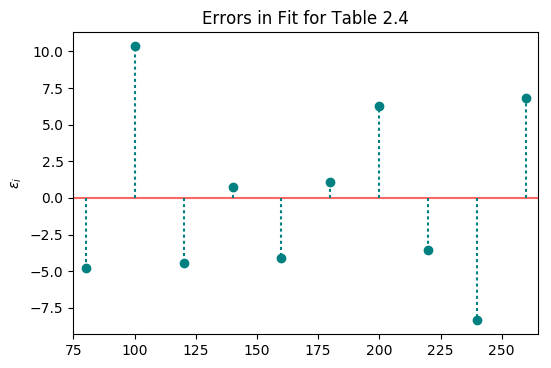

In [12]:
plt.figure(dpi=100)
plt.scatter(t24.X, t24.err, color="teal")
plt.hlines(0, min(t24.X)-5, max(t24.X)+5, alpha=0.6, color="red")
for e,x in zip(t24.err, t24.X):
    plt.plot((x, x), (0, e), color="teal", linestyle="dotted")
plt.xlim(min(t24.X)-5, max(t24.X)+5)
plt.title("Errors in Fit for Table 2.4")
plt.ylabel(r"$\epsilon_i$")
plt.show()

In [13]:
# Summary of errors
print("***Table 2.5***")
print("E[errs]={}".format(np.mean(t24.err)))
print("sigma(errs)={}".format(np.std(t24.err, ddof=2)))

***Table 2.5***
E[errs]=1.4210854715202005e-15
sigma(errs)=6.493003227250926


$$R^2$$

In [14]:
np.sum((t24.fit - t24.Y.mean())**2) / np.sum((t24.Y - t24.Y.mean())**2)

0.9620615604867568

### $\beta_1, \beta_2$ $t$-test

In [15]:
alpha = 0.05
## Beta 1
t1 = beta1_24 / np.sqrt(var_b1)
t2 = beta2_24 / np.sqrt(var_b2)

In [16]:
if t1 > -t.isf(1-alpha/2, len(t24) - 2):
    print("Rechazamos H0, B1 != 0")
    
if t2 > -t.isf(1-alpha/2, len(t24) - 2):
    print("Rechazamos H0, B2 != 0")

Rechazamos H0, B1 != 0
Rechazamos H0, B2 != 0


### J.B.

In [18]:
err = t24.Y - t24.fit
n = len(t24)
Sk = (sum(err**3) / n) / (sum(err**2) / n) ** (3/2)
Kt = (sum(err**4) / n) / (sum(err**2) / n) ** 2

jb = (Sk**2 / 6 + (Kt - 3)**2 / 24) * n

if jb < chi2.isf(1 - alpha, 2):
    print("No Rechazamos H0, los errores se distribuyen normalmente")